In [578]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [579]:
with open("all_clean_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Date,target_Apartment_rent
4,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01,1000.0
5,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,2011-08-01,1000.0
6,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,2011-09-01,1075.0
7,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,2011-10-01,995.0
8,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,2011-11-01,865.0


In [580]:
studio_df = merge_housing.loc[merge_housing['BedSize'] == 'Studio']
oneBed_df = merge_housing.loc[merge_housing['BedSize'] == '1Bedroom']
twoBed_df = merge_housing.loc[merge_housing['BedSize'] == '2Bedroom']

In [581]:
# Build model for Studio

In [582]:
studio_df = studio_df.dropna().set_index('Date')
studio_df.head()


,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsMom,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,target_Apartment_rent
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-01,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,67.5,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,1000.0
2011-08-01,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,20.3,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,1000.0
2011-09-01,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,28.6,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,1075.0
2011-10-01,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,3.7,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,995.0
2011-11-01,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,3.9,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,865.0


In [583]:
studio_df['Year'].value_counts()

2016    12
2015    12
2014    12
2013    12
2012    12
2017     8
2011     6
Name: Year, dtype: int64

In [584]:
# Linear Regression

In [585]:
studio_df = studio_df.drop(['Apartment_rent'], 1)
studio_past_df = studio_df[studio_df['Year'] < 2016]
studio_predict_df = studio_df[studio_df['Year'] >= 2016]
selectColumns = ['Year', 'Month', 'Zillow_Housing_price'                    
                                         , 'SoldAboveListYoy'
                                         , 'PriceDropsMom'
                                         , 'Inventory']

#X = studio_past_df.loc[:,selectColumns]
X = studio_past_df.iloc[:,1:-1]
y = studio_past_df.iloc[:,-1:]
X['Intercept'] = 1   


#X_predict_model = studio_predict_df.loc[:,selectColumns]
X_predict_model = studio_predict_df.iloc[:,1:-1]
y_predict_model = studio_predict_df.iloc[:,-1:]
X_predict_model['Intercept'] = 1   

studio_df.shape, studio_past_df.shape, studio_predict_df.shape

((74, 47), (54, 47), (20, 47))

In [586]:
X

,Year,Month,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,AvgSaleToList,AvgSaleToListMom,...,NewListingsMom,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Intercept
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-01,2011,7,2011,07,365300.0,36,25,22,0.969093,-0.2,...,67.5,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,1
2011-08-01,2011,8,2011,08,367900.0,36,24,22,0.971306,0.2,...,20.3,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,1
2011-09-01,2011,9,2011,09,381900.0,38,28,22,0.981019,1.0,...,28.6,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,1
2011-10-01,2011,10,2011,10,393600.0,38,29,28,0.984877,0.4,...,3.7,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,1
2011-11-01,2011,11,2011,11,400700.0,46,26,25,0.991455,0.7,...,3.9,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,1
2011-12-01,2011,12,2011,12,395100.0,45,29,26,0.992552,0.1,...,-6.3,-6.8,1.0,0.279230,0.020045,-0.042252,0.303323,0.010828,0.144919,1
2012-01-01,2012,1,2012,01,390600.0,50,31,30,0.991783,-0.1,...,-10.0,2.6,1.0,0.266467,-0.012763,-0.049207,0.296429,-0.006894,0.118817,1
2012-02-01,2012,2,2012,02,392100.0,47,25,24,0.992160,0.0,...,-5.9,-1.8,1.0,0.285342,0.018875,-0.030448,0.279461,-0.016967,0.148671,1
2012-03-01,2012,3,2012,03,400800.0,37,26,21,0.991613,-0.1,...,19.5,13.1,1.0,0.281732,-0.003609,-0.036479,0.311429,0.031967,0.160427,1


In [587]:
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0)
X_train.shape, y_train.shape, y_test.shape

((54, 46), (54, 1), (0, 1))

In [588]:
y_test.tail()

,target_Apartment_rent
Date,


In [589]:
X_train.shape, y_train.shape, type(X_train), type(y_train)

((54, 46), (54, 1), pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [590]:
fixed_y_test = y_test['target_Apartment_rent']
fixed_y_test_value = fixed_y_test.values
fixed_y_test_value

array([], dtype=float64)

In [591]:
lr = LinearRegression()
lr.fit(X_train, y_train)
X_predict_model.shape, y_predict_model.shape

((20, 46), (20, 1))

In [592]:
lr.score(X_train, y_train)

0.9925066770517645

In [593]:
lr.score(X_predict_model, y_predict_model)

-18.89748906678414

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


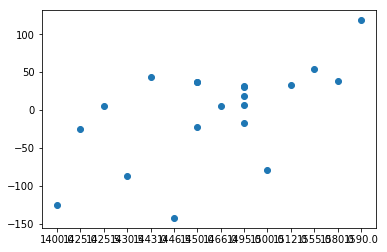

In [594]:
listy = [1e-9,1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1]
eCV = ElasticNetCV(alphas = listy, cv=5, random_state = 40)
LassoCVModel.fit(X_train, y_train)
y_predict = LassoCVModel.predict(X_predict_model)
plt.scatter(y_predict_model, (y_predict_model['target_Apartment_rent']-y_predict))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


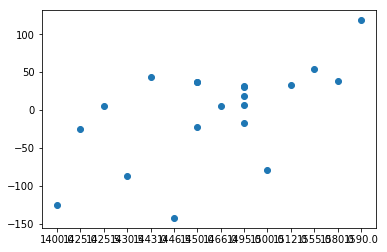

In [595]:
listy = [1e-9,1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1]
LassoCVModel = LassoCV(alphas = listy, cv=5, random_state = 40)
LassoCVModel.fit(X_train, y_train)
y_predict = LassoCVModel.predict(X_predict_model)
plt.scatter(y_predict_model, (y_predict_model['target_Apartment_rent']-y_predict))

In [596]:
LassoCVModel.score(X_predict_model, y_predict_model)

-0.5409661417683316

In [597]:
# results = LassoCVModel
# r2_adj = 1 - ((sum((fixed_y_test_value-y_predict)**2.0)/(len(X_test) - len(results.score(X_test, y_test)) - 1))
#                 /(sum((fixed_y_test_value - np.mean(fixed_y_test_value))**2.0)/(len(X_test) - 1)))    
# #compute the adjusted r2 in the test set
# r2_adj

In [598]:
y_predict_series = y_predict_model
y_predict_series['Predict_rent']=y_predict
y_predict_series.head()

,target_Apartment_rent,Predict_rent
Date,,
2016-01-01,1450.0,1413.123258
2016-02-01,1425.5,1420.142681
2016-03-01,1495.0,1477.237372
2016-04-01,1443.0,1399.471615
2016-05-01,1495.0,1488.681686


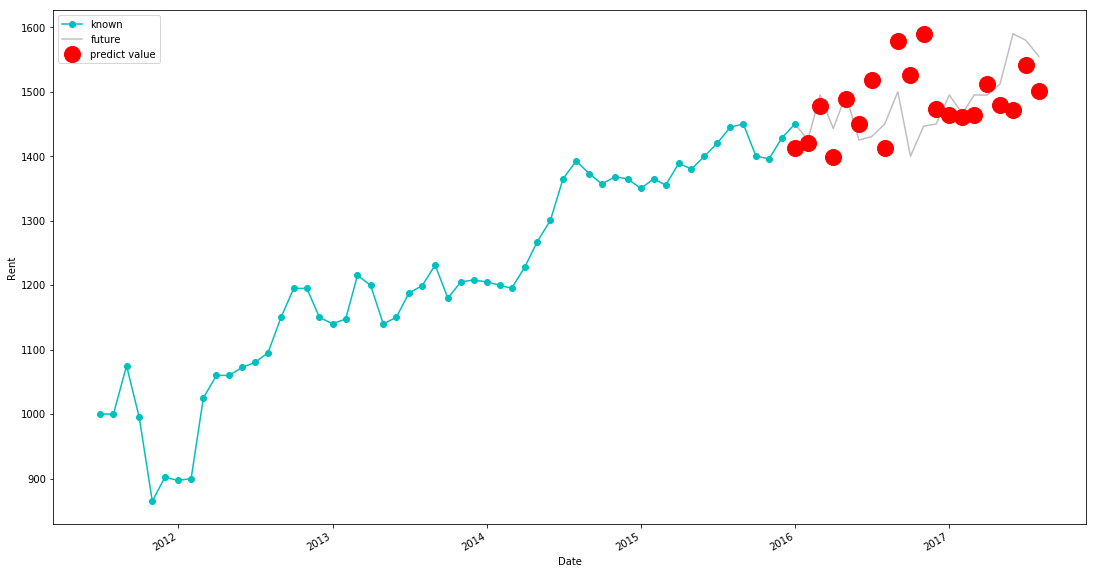

In [599]:
known = y_train['target_Apartment_rent'].append(y_predict_series['target_Apartment_rent'][0:1])
unknown = y_predict_series['target_Apartment_rent']
to_predict = y_predict_series['Predict_rent']

fig, ax = plt.subplots();
fig.set_size_inches(18.5, 10.5)
known.plot(ax=ax, c='c', marker='o', zorder=3);
unknown.plot(ax=ax, c='grey', alpha=0.5);
to_predict.plot(ax=ax, c='r', marker='o', markersize=16,
                linestyle='');

ax.legend(['known', 'future', 'predict value']);
ax.set_ylabel('Rent');

# PolynomialFeatures

In [480]:
from sklearn.preprocessing import PolynomialFeatures
#x_df_test = studio_df_droplowCorr.iloc[:,:-1]
x_df_test = studio_df.loc[:,['Year', 'Month', 'Zillow_Housing_price'                    
                                         , 'SoldAboveListYoy'
                                         , 'PriceDropsMom'
                                         , 'Inventory']]

y_df_test = studio_df.iloc[:,-1:]
x_df_test.columns


Index(['Year', 'Month', 'Zillow_Housing_price', 'SoldAboveListYoy',
       'PriceDropsMom', 'Inventory'],
      dtype='object')

In [481]:

x_df_test = x_df_test.dropna()
#y, X = patsy.dmatrices('Dep_Variable ~   ' + ' + '.join(X.columns), data=df, return_type="dataframe")
poly = PolynomialFeatures(1)
x_poly = poly.fit_transform(x_df_test)
X_transfer = pd.DataFrame(x_poly)
X_transfer.columns = poly.get_feature_names()
#len(X_transfer)
X_transfer.shape


(74, 7)

In [482]:

# Create your model
model = sm.OLS(y_train,X_train)
fit = model.fit()
fit.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [483]:
y_pred = fit.predict(X_test)
k = np.sqrt(np.mean((y_test['target_Apartment_rent'] - y_pred)**2))
k, np.exp(k)

ValueError: shapes (0,42) and (6,) not aligned: 42 (dim 1) != 6 (dim 0)

In [112]:
results = fit
r2_adj = 1 - ((sum((y_test['target_Apartment_rent']-results.predict(X_test))**2.0)/(len(X_test) - len(results.params) - 1))
                /(sum((y_test['target_Apartment_rent'] - np.mean(y_test['target_Apartment_rent']))**2.0)/(len(X_test) - 1)))    
#compute the adjusted r2 in the test set
r2_adj

-49.849411334875214

In [115]:
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(studio_df)
pyplot.show()